1. Import Libraries

In [1]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 
import requests 
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

print('Libraries Imported.')

Libraries Imported.


2. Load the Data

In [2]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [3]:
neighborhoods_data = newyork_data['features']

In [4]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

3. Transform the data into a pandas dataframe

In [5]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

4. Create a map of NY neighborhoods 

In [8]:
latitude = 40.7127281
longitude = -74.0060152

In [9]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

5. Define Foursquare Credentials

In [10]:
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize

import folium
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [11]:
CLIENT_ID = 'M5OTUNUDLFZPJ4MFUJKJWTML3DU3VP5B3HBFQHC2PK5BPUMZ' 
CLIENT_SECRET = '5HJPK40BSKJJLDVMDR4WFO2PKOK5YOYCZ5Z2SZ4PSDUO5H3K' 
VERSION = '20180605' 

In [12]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
nyc_neighborhood_data = newyork_data['features']
nyc_neighborhood_data[2]

{'type': 'Feature',
 'id': 'nyu_2451_34572.3',
 'geometry': {'type': 'Point',
  'coordinates': [-73.82780644716412, 40.887555677350775]},
 'geometry_name': 'geom',
 'properties': {'name': 'Eastchester',
  'stacked': 1,
  'annoline1': 'Eastchester',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.82780644716412,
   40.887555677350775,
   -73.82780644716412,
   40.887555677350775]}}

In [13]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

nyc_neighborhoods = pd.DataFrame(columns=column_names)

for data in nyc_neighborhood_data:
    borough = nyc_neighborhood_data = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    nyc_neighborhoods = nyc_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
nyc_neighborhoods.head(4)

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643

In [14]:
def createURL(endpoint, CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, categoryId, limit):
    url = '{}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            endpoint,
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            categoryId,
            limit
        )
    return url

endpoint = 'https://api.foursquare.com/v2/venues/search?'
categoryIds = ['4bf58dd8d48988d102941735', 
              ]
radius = 500
categoryId = ','.join(categoryIds)
limit = 50

In [15]:
def getVenues(neighborhoods, latitudes, longitudes, radius=1000):
    endpoint = 'https://api.foursquare.com/v2/venues/search?'
    venues_list = []   
    
    for hood_name, lat, lng in zip(neighborhoods, latitudes, longitudes):
    
        url = createURL(endpoint, CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, categoryId, limit)
        
        results = requests.get(url).json()['response']['venues']

        for item in results:
            venue_name = item['name']
            venue_category = item['categories'][0]['name']
            venue_lat = item['location']['lat']
            venue_lng = item['location']['lng']
            try:
                venue_city = item['location']['city']
            except:
                venue_city = 'N/A'
            venue_state = item['location']['state']
            
            venues_list.append([(hood_name,
                                lat,
                                lng,
                                venue_name,
                                venue_category,
                                venue_lat,
                                venue_lng,
                                venue_city,
                                venue_state
                               )])
            
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Neighborhood Latitude',
                             'Neighborhood Longitude',
                             'Venue Name',
                             'Venue Category',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue City',
                             'Venue State'
                            ]
    return nearby_venues

prelim_venue_data = getVenues(nyc_neighborhoods['Neighborhood'],
                                         nyc_neighborhoods['Latitude'],
                                         nyc_neighborhoods['Longitude'],
                                         radius
                                        )

In [16]:
print(prelim_venue_data.shape)
prelim_venue_data.head(4)

(625, 9)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0     Marble Hill              40.876551              -73.910660   
1     Marble Hill              40.876551              -73.910660   
2        Woodlawn              40.898273              -73.867315   
3  Williamsbridge              40.881039              -73.857446   

                   Venue Name Venue Category  Venue Latitude  Venue Longitude  \
0                 Bikram Yoga    Yoga Studio       40.876844       -73.906204   
1            One Yoga For All    Yoga Studio       40.880527       -73.910067   
2  Fifth Element Yoga & Reiki    Yoga Studio       40.903065       -73.866412   
3               Mind And Body    Yoga Studio       40.878978       -73.863296   

  Venue City Venue State  
0      Bronx          NY  
1      Bronx          NY  
2    Yonkers          NY  
3        N/A    New York

In [17]:
%pylab inline  
import pandas as pd
import numpy as np
import folium
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [18]:
coords = prelim_venue_data.as_matrix(columns=['Neighborhood Latitude', 'Neighborhood Longitude'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


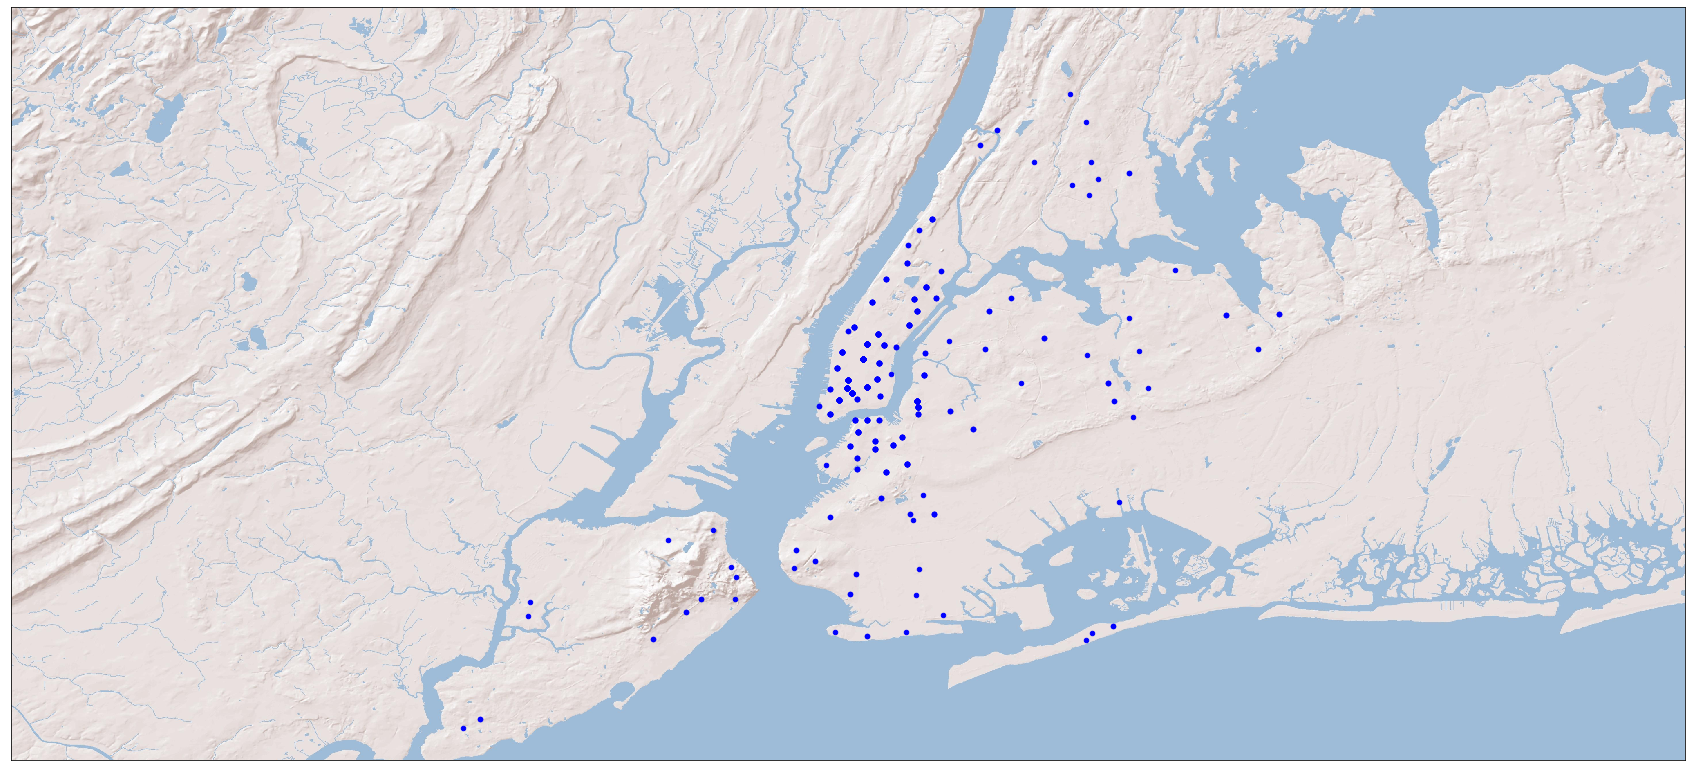

In [21]:
plt.figure(figsize = (30, 30))

m = Basemap(projection='merc', resolution='l', epsg = 4269, 
            llcrnrlon=-74.5,llcrnrlat=40.5, urcrnrlon=-73.5,urcrnrlat=40.95)

x, y = m(coords[:, 1], coords[:, 0])
m.scatter(x,y,20,marker='o',color='b')
m.arcgisimage(service='World_Shaded_Relief', xpixels = 5000, verbose= False)
    
plt.show()

In [22]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian

# Run the DBSCAN from sklearn
db = DBSCAN(eps=epsilon, min_samples=5, algorithm='ball_tree', \
            metric='haversine').fit(np.radians(coords))

cluster_labels = db.labels_
n_clusters = len(set(cluster_labels))

# get the cluster
# cluster_labels = -1 means outliers
clusters = \
    pd.Series([coords[cluster_labels == n] for n in range(-1, n_clusters)])

In [23]:
import matplotlib.cm as cmx
import matplotlib.colors as colors

# define a helper function to get the colors for different clusters
def get_cmap(N):
    '''
    Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.
    '''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='nipy_spectral') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


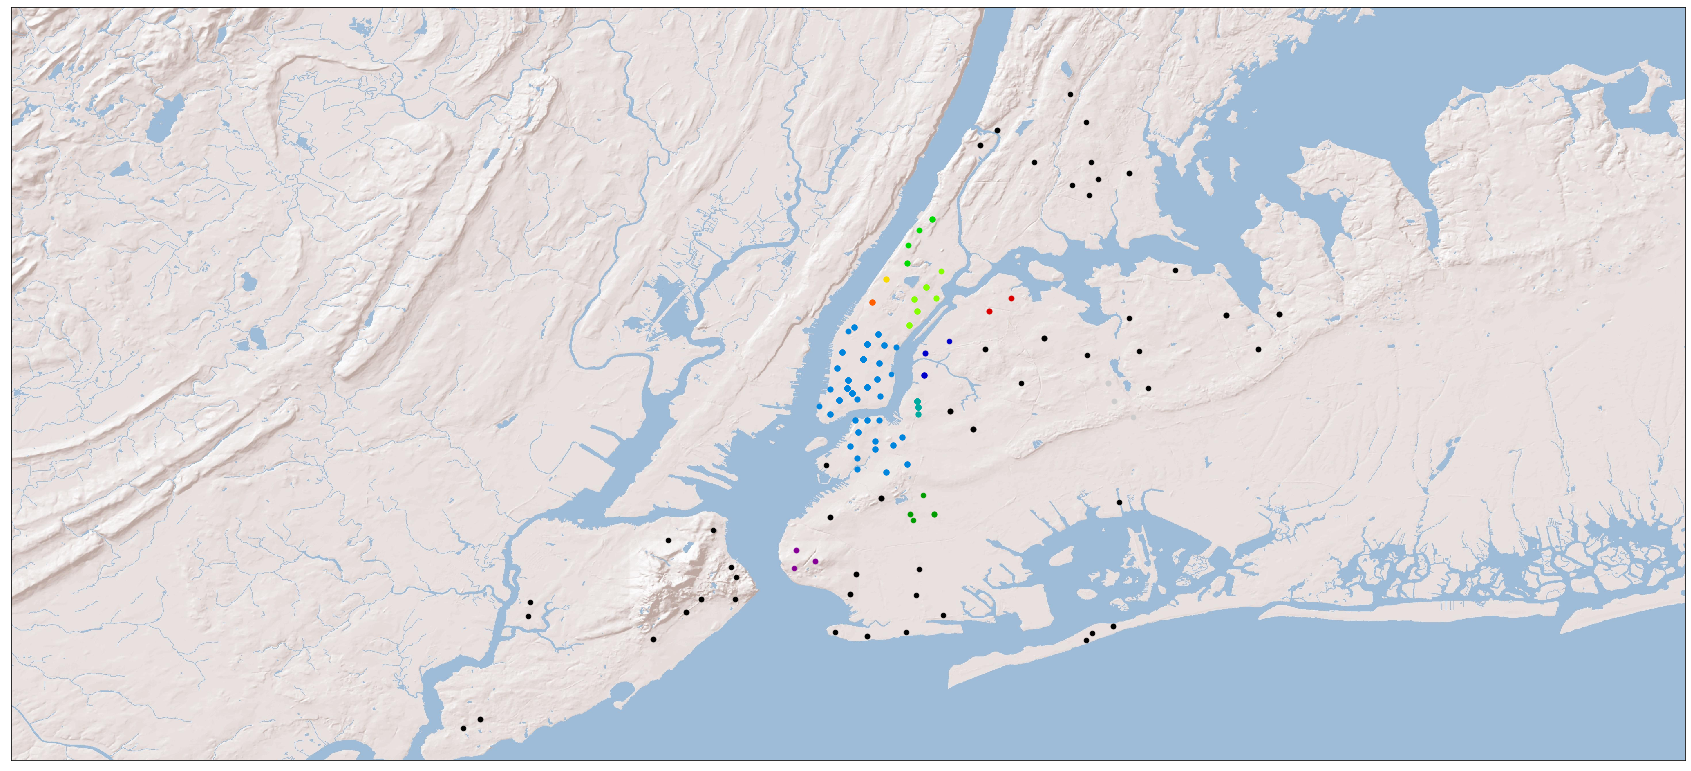

In [24]:
plt.figure(figsize = (30, 30))
m = Basemap(projection='merc', resolution='l', epsg = 4269, 
        llcrnrlon=-74.5,llcrnrlat=40.5, urcrnrlon=-73.5,urcrnrlat=40.95)

unique_label = np.unique(cluster_labels)

# get different color for different cluster
cmaps = get_cmap(n_clusters)

# plot different clusters on map, note that the black dots are 
# outliers that not belone to any cluster. 
for i, cluster in enumerate(clusters):
    lons_select = cluster[:, 1]
    lats_select = cluster[:, 0]
    x, y = m(lons_select, lats_select)
    m.scatter(x,y,20,marker='o',color=cmaps(i), zorder = 10)

m.arcgisimage(service='World_Shaded_Relief', xpixels = 5000, verbose= False)

plt.show()